<a href="https://colab.research.google.com/github/ANSHI2105/Hyperspectral-Mycotoxin-Prediction/blob/main/ImagoAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Exploration and Preprocessing**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ImagoAI.csv')

In [4]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [5]:
df.shape

(500, 450)

In [6]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


Checking missing values :-

In [9]:
missing_values = df.isna().sum()
print(missing_values)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [10]:
tot_missing_values = df.isna().sum().sum()
tot_missing_values

0

**Result:** No missing values or NULL value present in dataset

Removing Duplicates:-

In [11]:
df.shape

(500, 450)

In [12]:
df = df.drop_duplicates()
df.shape

(500, 450)

**Result:** No duplicte values were in dataset

Finding Maximum and Minimum value(Range) for each column:-

In [13]:
range = pd.DataFrame({
    'Columns':  df.columns,
    'Min_value': [df[col].min() for col in df.columns],
    'Max_value': [df[col].max() for col in df.columns]
})
range.drop(range.index[0], inplace=True)
range = range.set_index("Columns")
range

,Min_value,Max_value
Columns,,
0,0.311182,0.556287
1,0.295321,0.530168
2,0.284064,0.528774
3,0.282054,0.533202
4,0.296702,0.511909
...,...,...
444,0.571767,0.945225
445,0.577803,0.932812
446,0.576985,0.931381


**Result:** Spectral data distribution, have values in the range between 0 and 1. Only vomitoxin_ppb(DON concentration) has large range, which indicates a highly skewed distribution.


In [14]:
vomitoxin_ppb_mean = df['vomitoxin_ppb'].mean()
vomitoxin_ppb_mean

3410.006

In [15]:
vomitoxin_ppb_std = df['vomitoxin_ppb'].std()
vomitoxin_ppb_std = round(vomitoxin_ppb_std, 2)
vomitoxin_ppb_std

13095.8

Standard deviation is large (13,095), suggesting significant variation.

In [16]:
CV = (vomitoxin_ppb_std / vomitoxin_ppb_mean) * 100
CV = round(CV, 2)
CV

384.04

Here CV is 384% that is very much large. Data has potenital **outliers** in **vomitoxin_ppb** column




If CV < 30%, variation is low, data is stable.

If CV > 50%, data is highly variable, spread out and potential outliers.

Visual representation to identify outliers, or inconsistencies in the target variable (vomitoxin_ppb):-


**Boxplot**

In [17]:
import seaborn as sns

<Axes: ylabel='vomitoxin_ppb'>

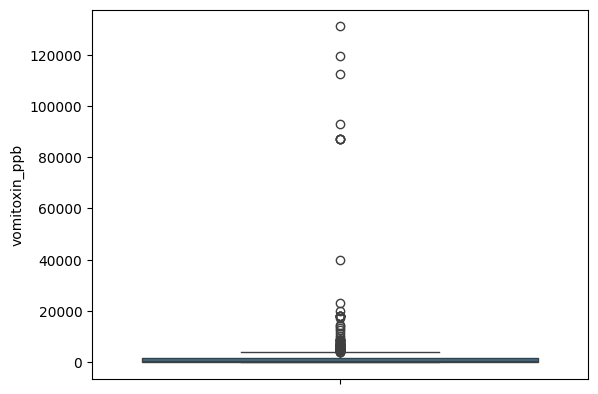

In [18]:
sns.boxplot(df['vomitoxin_ppb'])

**Scatter plot**

In [19]:
import matplotlib.pyplot as plt

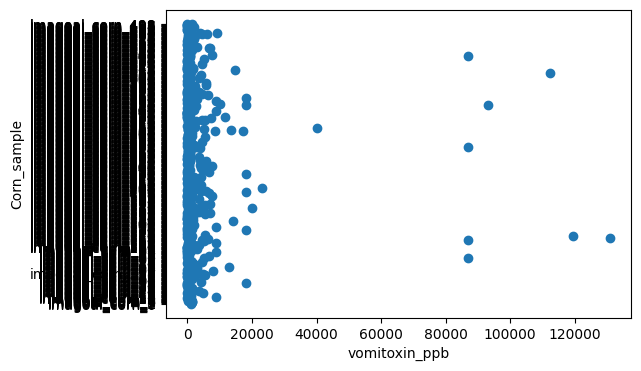

In [20]:
fig, skplot = plt.subplots(figsize=(6, 4))
skplot.scatter(df['vomitoxin_ppb'], df['hsi_id'])
skplot.set_xlabel('vomitoxin_ppb')
skplot.set_ylabel('Corn_sample')
plt.show()

Histplot to identify type of distribution(Normal Distribuion or not)

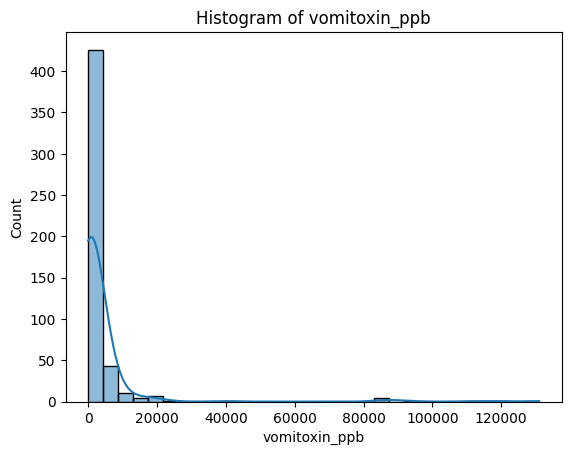

In [21]:
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True)
plt.title("Histogram of vomitoxin_ppb")
plt.show()

**Result:** Skew distribution

Identify and remove outliers from vomitoxin_ppb using the **IQR method** as data is not normally distributed

In [22]:
import numpy as np

In [23]:
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['vomitoxin_ppb'] >= lower_bound) & (df['vomitoxin_ppb'] <= upper_bound)]
df_filtered.shape

(420, 450)

<Axes: ylabel='vomitoxin_ppb'>

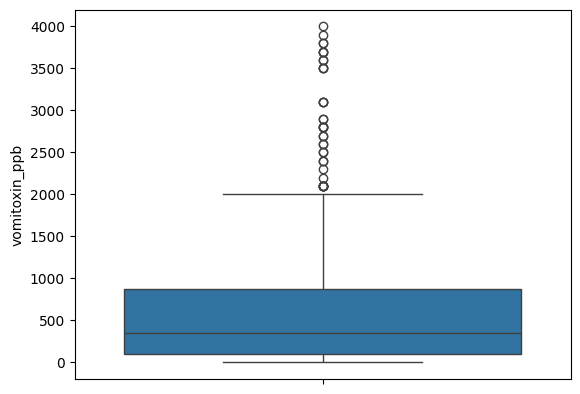

In [24]:
sns.boxplot(df_filtered['vomitoxin_ppb'])

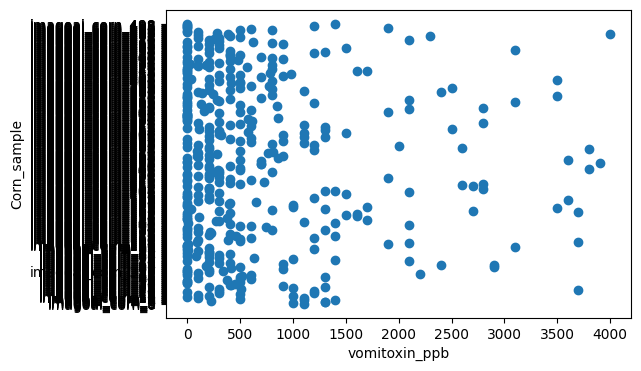

In [25]:
fig, skplot = plt.subplots(figsize=(6, 4))
skplot.scatter(df_filtered['vomitoxin_ppb'], df_filtered['hsi_id'])
skplot.set_xlabel('vomitoxin_ppb')
skplot.set_ylabel('Corn_sample')
plt.show()

**Result:** After the initial cleaning, the data still contains significant noise.  

**Action Plan:** Further data preprocessing and noise reduction are required to improve quality.

Histplot to identify type of distribution of cleaned data

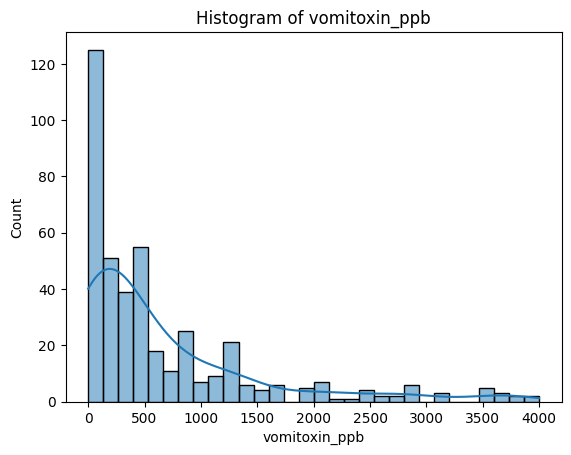

In [26]:
sns.histplot(df_filtered['vomitoxin_ppb'], bins=30, kde=True)
plt.title("Histogram of vomitoxin_ppb")
plt.show()

Remove Outliers using **IQR Method**

In [27]:
Q1 = df_filtered['vomitoxin_ppb'].quantile(0.25)
Q3 = df_filtered['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered2 = df_filtered[(df_filtered['vomitoxin_ppb'] >= lower_bound) & (df_filtered['vomitoxin_ppb'] <= upper_bound)]
df_filtered2.shape

(382, 450)

<Axes: ylabel='vomitoxin_ppb'>

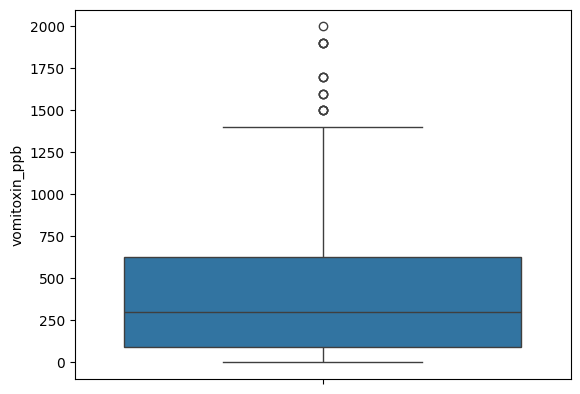

In [28]:
sns.boxplot(df_filtered2['vomitoxin_ppb'])

**Result:** Not properly clean, data still contains significant noise.  

**Action Plan:** Further data preprocessing and noise reduction are required to improve quality.

In [29]:
Q1 = df_filtered2['vomitoxin_ppb'].quantile(0.25)
Q3 = df_filtered2['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered3 = df_filtered2[(df_filtered2['vomitoxin_ppb'] >= lower_bound) & (df_filtered2['vomitoxin_ppb'] <= upper_bound)]
df_filtered3.shape

(367, 450)

<Axes: ylabel='vomitoxin_ppb'>

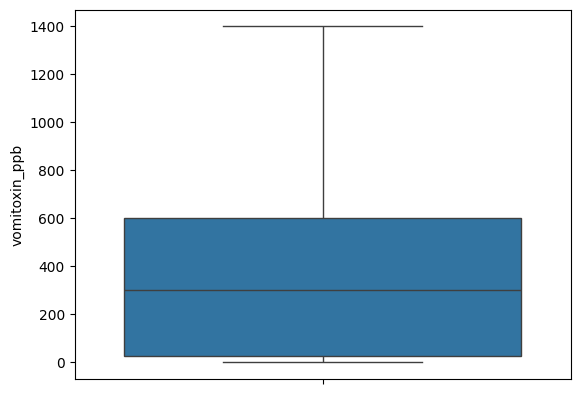

In [30]:
sns.boxplot(df_filtered3['vomitoxin_ppb'])

Dataset is properly cleaned with significant remaining data.

**Feature Scaling**

**Spectral features normalisation** using Min-Max Scaling

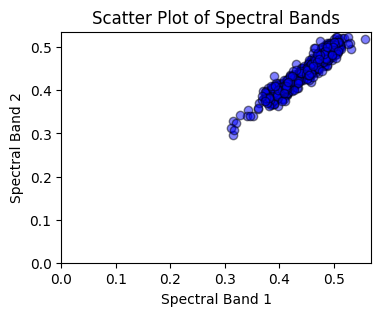

In [31]:
spectral_data = df_filtered3.iloc[:, 1:-1]
x_values = spectral_data.iloc[:, 0].values
y_values = spectral_data.iloc[:, 1].values
x_values = np.abs(x_values)
y_values = np.abs(y_values)

plt.figure(figsize=(4, 3))
plt.scatter(x_values, y_values, alpha=0.5, c='blue', edgecolors='k')
plt.xlabel("Spectral Band 1")
plt.ylabel("Spectral Band 2")
plt.title("Scatter Plot of Spectral Bands")
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_filtered3.iloc[:, 1:-1] = scaler.fit_transform(df_filtered3.iloc[:, 1:-1])

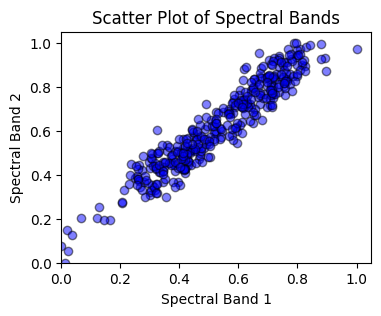

In [33]:
spectral_data = df_filtered3.iloc[:, 1:-1]
x_values = spectral_data.iloc[:, 0].values
y_values = spectral_data.iloc[:, 1].values
x_values = np.abs(x_values)
y_values = np.abs(y_values)

plt.figure(figsize=(4, 3))
plt.scatter(x_values, y_values, alpha=0.5, c='blue', edgecolors='k')
plt.xlabel("Spectral Band 1")
plt.ylabel("Spectral Band 2")
plt.title("Scatter Plot of Spectral Bands")
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

**Visualisation** of spectral bands using line plots and heatmaps to explore data characteristics.

In [34]:
df_filtered3.columns[1:-1]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '438', '439', '440', '441', '442', '443', '444', '445', '446', '447'],
      dtype='object', length=448)

In [35]:
df_filtered3.shape

(367, 450)

In [36]:
df_filtered3 = df_filtered3.reset_index(drop=True)

 **Line plot** for 10 random samples

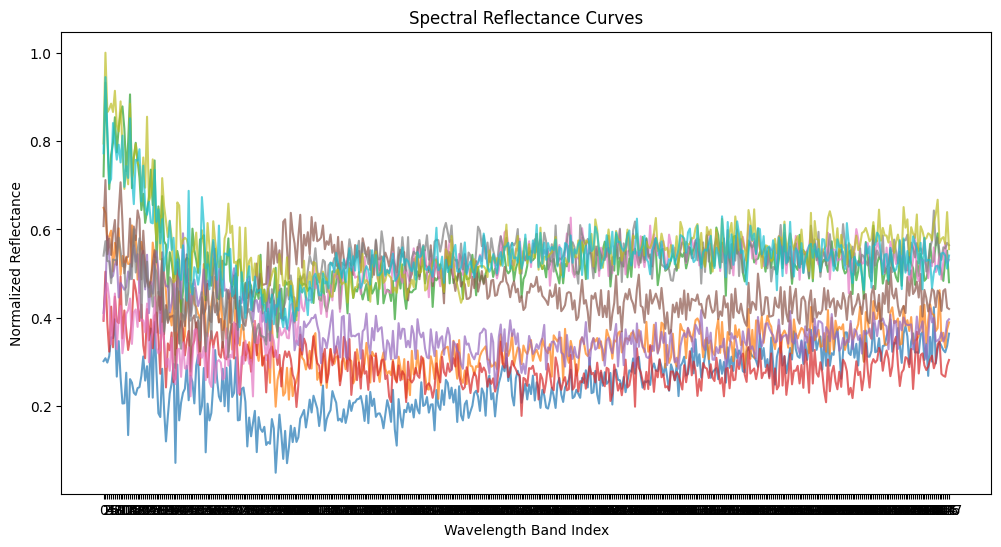

In [37]:
plt.figure(figsize=(12, 6))
for i in np.random.choice(df_filtered3.index, size=10, replace=False):
    plt.plot(df_filtered3.columns[1:-1], df_filtered3.iloc[i, 1:-1], alpha=0.7)
plt.xlabel("Wavelength Band Index")
plt.ylabel("Normalized Reflectance")
plt.title("Spectral Reflectance Curves")
plt.show()

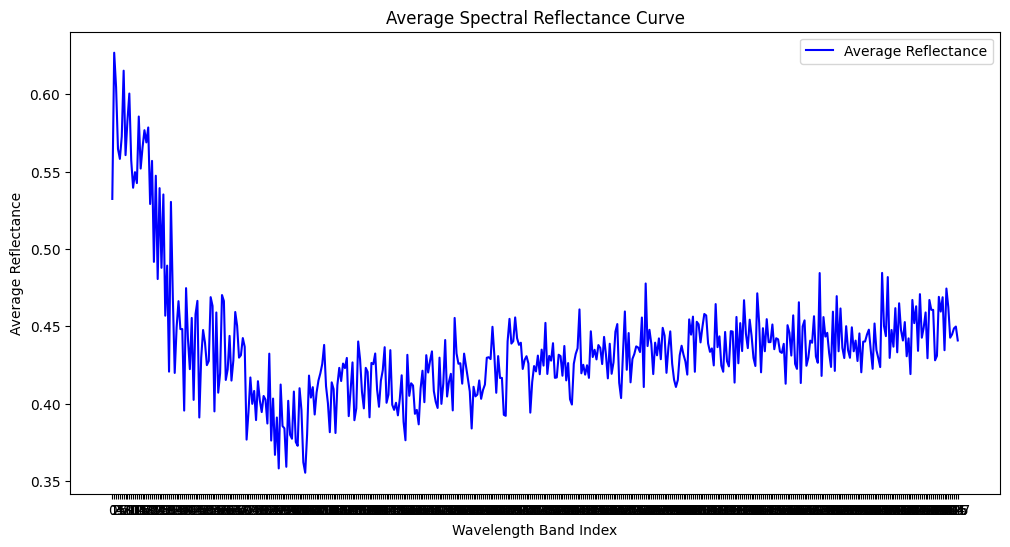

In [38]:
mean_spectrum = df_filtered3.iloc[:, 1:-1].mean(axis=0)
plt.figure(figsize=(12, 6))
plt.plot(df_filtered3.columns[1:-1], mean_spectrum, color="blue", label="Average Reflectance")
plt.xlabel("Wavelength Band Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Curve")
plt.legend()
plt.show()

Average Spectral Reflectance Curve observe general trends and identify key wavelength ranges contributing to mycotoxin levels.

There is large variations in different bands, it indicates that some wavelengths may be useful features for predicting mycotoxin levels.

 **Heatmap** for 10 random samples

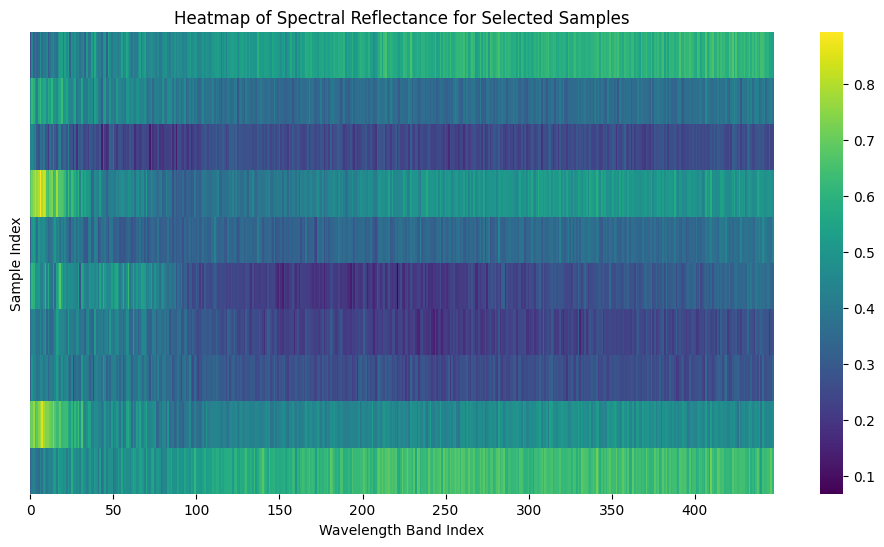

In [39]:
num_samples = 10
sample_indices = np.random.choice(df_filtered3.index, size=num_samples, replace=False)
subset = df_filtered3.iloc[sample_indices, 1:-1]

plt.figure(figsize=(12, 6))
sns.heatmap(subset, cmap="viridis", xticklabels=50, yticklabels=False)
plt.xlabel("Wavelength Band Index")
plt.ylabel("Sample Index")
plt.title("Heatmap of Spectral Reflectance for Selected Samples")
plt.show()

Visualize spectral reflectance across multiple samples and compares reflectance values across different bands for a subset of samples. Helps to identify similarities and differences among samples.

It compares samples by representing **individual corn samples as rows** and **wavelength bands as columns**, where **color intensity indicates reflectance values**—**brighter areas** correspond to **higher reflectance**, while **darker areas** indicate **lower reflectance**, helping in **clustering and identifying outlier samples**.

# **PCA Dimensionality Reduction**

In [40]:
from sklearn.decomposition import PCA

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_filtered3.iloc[:, 1:-1] = scaler.fit_transform(df_filtered3.iloc[:, 1:-1])

In [42]:
X = df_filtered3.iloc[:, 1:-1].values
y = df_filtered3["vomitoxin_ppb"].values

In [43]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)

In [44]:
pca.explained_variance_.shape

(367,)

In [45]:
pca.components_.shape

(367, 448)

In [46]:
pca.explained_variance_ratio_.shape

(367,)

In [47]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

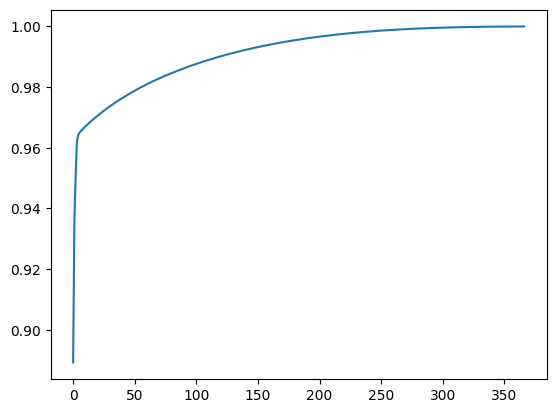

In [48]:
plt.plot(cumulative_sum)

In [49]:
cumulative_sum_per = cumulative_sum*100
cumulative_sum_per

array([ 88.92294025,  93.62602891,  95.03107745,  96.16457698,
        96.40840628,  96.48771718,  96.53897589,  96.58210929,
        96.62442576,  96.66650517,  96.70579521,  96.74456765,
        96.78302189,  96.82114653,  96.85779138,  96.89323995,
        96.92807824,  96.96260804,  96.9968451 ,  97.03097739,
        97.06456611,  97.09798375,  97.13066639,  97.16235195,
        97.19368076,  97.22469854,  97.2553804 ,  97.28557888,
        97.31499819,  97.34389459,  97.37251677,  97.40101747,
        97.4293268 ,  97.45736746,  97.48504991,  97.51241816,
        97.53934544,  97.56586873,  97.5920542 ,  97.61805357,
        97.64354333,  97.66869099,  97.69353222,  97.7180615 ,
        97.74246674,  97.7666737 ,  97.79053194,  97.81378726,
        97.83694719,  97.85990939,  97.88285754,  97.90549667,
        97.92786662,  97.95004262,  97.97184834,  97.99347108,
        98.01478349,  98.03600145,  98.05714736,  98.07784106,
        98.09834279,  98.11860512,  98.13862197,  98.15

After seeing **plot** of Cumulative Variance and **Cumulative Sum Precent** values, **5** is the most optimum number for Principle Components as first 3 Eigen vectors cover more than **96% variance** of original data.

In [50]:
pca = PCA(n_components=5)
X_pca_trf = pca.fit_transform(X)

In [51]:
pca.explained_variance_

array([399.46322798,  21.12740506,   6.31181586,   5.09195242,
         1.09533988])

In [52]:
pca.components_

array([[ 0.03659716,  0.03753795,  0.03786517, ...,  0.04803859,
         0.04785307,  0.04806514],
       [ 0.0777671 ,  0.07302937,  0.07504256, ..., -0.01298516,
        -0.01293078, -0.0148512 ],
       [-0.06786206, -0.06385885, -0.07295829, ..., -0.05631899,
        -0.06420373, -0.05707394],
       [ 0.20867316,  0.21186584,  0.1996411 , ..., -0.05424965,
        -0.05207503, -0.04801238],
       [ 0.13266878,  0.1214463 ,  0.13628911, ...,  0.09877887,
         0.10273178,  0.09923688]])

In [53]:
pca.explained_variance_ratio_

array([0.8892294 , 0.04703089, 0.01405049, 0.011335  , 0.00243829])

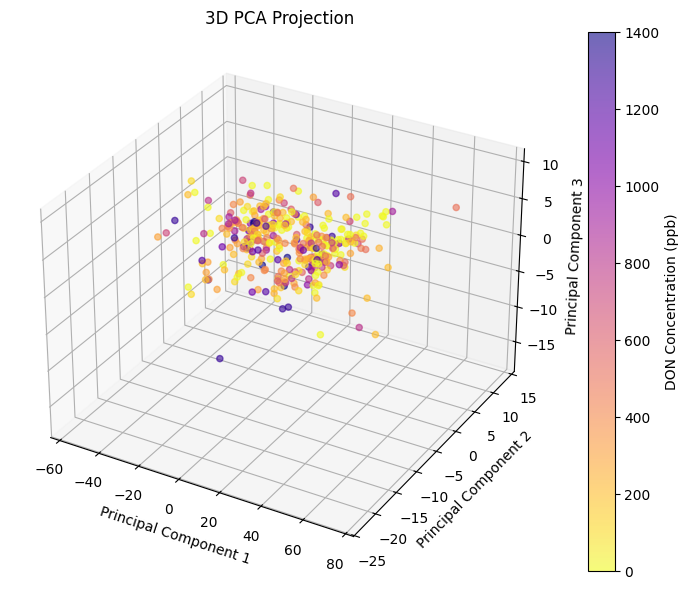

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_trf[:, 0], X_pca_trf[:, 1], X_pca_trf[:, 2], c=y, cmap="plasma_r", alpha=0.6)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")

plt.colorbar(sc, label="DON Concentration (ppb)")
plt.show()

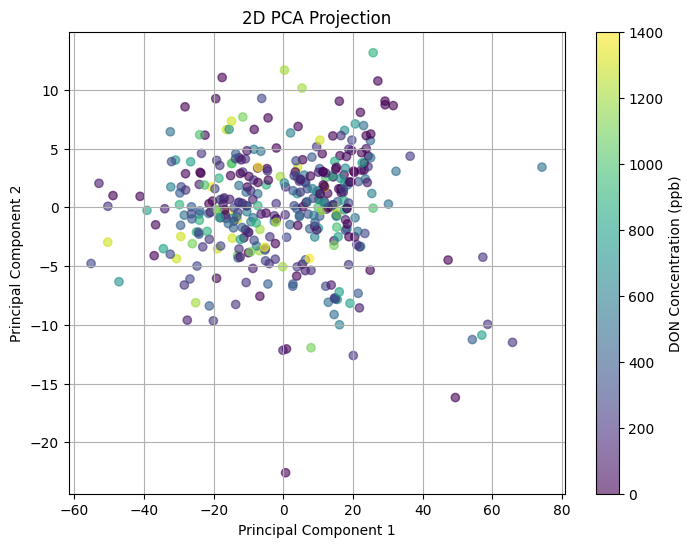

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_trf[:, 0], X_pca_trf[:, 1], c=y, cmap="viridis", alpha=0.6)
plt.colorbar(label="DON Concentration (ppb)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.grid()
plt.show()

# **Model Training**

Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_trf, y, test_size=0.3, random_state=42)

**LinearRegression Model**

In [57]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([ 252.13060574,  377.21907249,  380.08694162,  311.64450419,
        428.35107504,  328.84367057,  377.25960289,  355.44315768,
        426.52999267,  361.65325821,  330.721404  ,  389.61751697,
        466.7297856 ,  435.1016516 ,  319.43095754,  265.74663756,
        429.72657361,  326.45870338,  347.34979663,  308.10801923,
        398.68622221,  303.43108262,  360.80717323,  384.61581669,
        375.22811076,  315.77977129,  378.68636876,  275.99379796,
        423.94201402,  335.44293597,  364.20859116,  347.71362763,
        342.82308691,  399.26051508,  364.07375026,  338.24773652,
        388.1808362 ,  356.5351164 ,  239.853996  ,  284.73267574,
        244.6360598 ,  391.33865949,  329.3301579 ,  335.32349863,
        357.07101779,  385.39604464,  424.81635583,  399.24870548,
        380.0252896 ,  455.98930834,  400.13525843,  488.81123838,
        570.25116371,  242.37703632,  374.32275899,  305.83680764,
        254.28966021,  322.07602673,  248.05790532,  435.44469

**Random Forest Model**

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([ 157.43,  420.5 ,  477.7 ,  102.7 ,  326.5 ,  326.26,  473.8 ,
        481.5 ,  215.62,  385.44,  350.44,  494.43,  232.  ,  391.  ,
        337.  ,  241.89,  390.  ,  393.23,  529.74,  390.03,  530.7 ,
        462.94,  222.2 ,  299.2 ,  356.93,  514.3 ,  306.34,  112.9 ,
        282.9 ,  273.  ,  565.1 ,  422.4 ,  208.  ,  448.1 ,  565.2 ,
        583.3 ,  376.8 ,  255.3 ,  232.3 ,  211.2 ,  107.76,  323.  ,
        335.8 ,  379.4 ,  227.6 ,  561.3 ,  322.2 ,  599.  ,  349.1 ,
        451.1 ,  215.2 ,  444.78,  657.9 ,  270.53,  228.9 ,  242.08,
        362.1 ,  167.2 ,   83.8 ,  521.18,  348.8 ,  223.7 ,  759.5 ,
        132.07,  345.  ,  373.7 ,  451.1 , 1102.12,  425.8 ,  351.  ,
        564.6 ,  211.8 ,  467.  ,  618.3 ,  308.9 ,  306.5 ,  567.  ,
        434.4 ,  517.07,  686.65,  433.23,  405.54,  485.5 ,  321.96,
        408.79,  195.17,  496.93,  290.4 ,  486.  ,  512.2 ,  332.5 ,
        412.54,  345.8 ,  253.6 ,  106.33,  563.36,  406.2 ,  287.2 ,
        538.24,  384

 **XGBoost Model**

In [59]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([  97.47132 ,  585.94495 ,  690.3535  ,  199.13991 ,  362.52075 ,
        306.18997 ,  609.7976  ,  491.34122 ,  109.69727 ,  165.96658 ,
        226.71793 ,  524.3803  ,  131.0893  ,  414.08832 ,  216.00752 ,
        314.2641  ,  290.01385 ,  423.56354 ,  591.54834 ,  480.27484 ,
        320.58447 ,  524.4275  ,  164.47163 ,  330.56714 ,  484.62094 ,
        512.03687 ,  200.262   ,  165.16829 ,  219.10233 ,  167.8832  ,
        885.6945  ,  625.57465 ,  260.1191  ,  425.97647 ,  557.50525 ,
        483.46838 ,  266.2481  ,  405.5906  ,  514.2698  ,  105.275635,
         66.9752  ,  306.97845 ,  331.90274 ,  383.40775 ,  205.33023 ,
        614.2683  ,  256.17383 ,  624.5294  ,  145.40756 ,  404.8204  ,
        180.69724 ,  303.78775 ,  479.22903 ,  265.81442 ,  337.80728 ,
        291.28568 ,  311.4723  ,  105.53082 ,   78.32387 ,  461.4421  ,
        313.70966 ,  152.83046 ,  530.64526 ,   25.770449,  365.11658 ,
        386.33917 ,  453.5496  , 1294.0969  ,  511.65768 ,  447.

# **Model Evaluation**

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
print(y_test)

[ 760.    0.  300.   20.  200.  700.    0.  400.  500.    0.  900.  500.
  400.  300. 1200.    0. 1100.  300.    0.    0. 1100.  200.  100.  200.
  500.  810. 1100.  100.  100.    0.  900.   10.    0.  100.   90.    0.
  200. 1000.  300.  200.    0.  400.    0.  780. 1400.  300. 1400.  400.
 1400.  200.  100.  800.    0.    0.  400.  200.    0. 1300.    0.  200.
    0.  500.    0.    0.    0.    0. 1300. 1300.  100.   90.  400.  280.
  400.  400.  620. 1200. 1200.  100.    0. 1200.  300.  100.  500.    0.
    0.  500.  800.    0.  800. 1100.  400. 1000.  300.  280.  650.  300.
  200.    0.  200. 1300. 1200.  700.  500.  500.    0.    0.  600. 1200.
  900.    0.    0.]


In [62]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance: MAE={mae:.2f}, RMSE={rmse:.2f}, R^2={r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance: MAE=333.47, RMSE=417.92, R^2=0.08
Random Forest Performance: MAE=355.86, RMSE=441.09, R^2=-0.02
XGBoost Performance: MAE=382.00, RMSE=479.10, R^2=-0.21


**Optimizing hyperparameters**

 1. Grid Search CV

**For Random Forest**

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluatation
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf_best, "Random Forest (Grid Search)")


Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest (Grid Search) Performance: MAE=350.19, RMSE=436.00, R^2=0.00


**For XGBoost**

In [65]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluatation
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb_best, "XGBoost (Grid Search)")

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
XGBoost (Grid Search) Performance: MAE=349.36, RMSE=432.27, R^2=0.02


2. Random Search CV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best RF Parameters:", random_search_rf.best_params_)

random_search_xgb = RandomizedSearchCV(XGBRegressor(random_state=42), param_grid_xgb, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
print("Best XGBoost Parameters:", random_search_xgb.best_params_)


Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}


**Model Evaluation after Optimisation**

Random Forest Model

In [68]:
rf_model2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model2.fit(X_train, y_train)
y_pred_rf2 = rf_model.predict(X_test)
y_pred_rf2

array([ 157.43,  420.5 ,  477.7 ,  102.7 ,  326.5 ,  326.26,  473.8 ,
        481.5 ,  215.62,  385.44,  350.44,  494.43,  232.  ,  391.  ,
        337.  ,  241.89,  390.  ,  393.23,  529.74,  390.03,  530.7 ,
        462.94,  222.2 ,  299.2 ,  356.93,  514.3 ,  306.34,  112.9 ,
        282.9 ,  273.  ,  565.1 ,  422.4 ,  208.  ,  448.1 ,  565.2 ,
        583.3 ,  376.8 ,  255.3 ,  232.3 ,  211.2 ,  107.76,  323.  ,
        335.8 ,  379.4 ,  227.6 ,  561.3 ,  322.2 ,  599.  ,  349.1 ,
        451.1 ,  215.2 ,  444.78,  657.9 ,  270.53,  228.9 ,  242.08,
        362.1 ,  167.2 ,   83.8 ,  521.18,  348.8 ,  223.7 ,  759.5 ,
        132.07,  345.  ,  373.7 ,  451.1 , 1102.12,  425.8 ,  351.  ,
        564.6 ,  211.8 ,  467.  ,  618.3 ,  308.9 ,  306.5 ,  567.  ,
        434.4 ,  517.07,  686.65,  433.23,  405.54,  485.5 ,  321.96,
        408.79,  195.17,  496.93,  290.4 ,  486.  ,  512.2 ,  332.5 ,
        412.54,  345.8 ,  253.6 ,  106.33,  563.36,  406.2 ,  287.2 ,
        538.24,  384

XGBoost Model

In [69]:
xgb_model2 = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
xgb_model2.fit(X_train, y_train)
y_pred_xgb2 = xgb_model.predict(X_test)
y_pred_xgb2

array([  97.47132 ,  585.94495 ,  690.3535  ,  199.13991 ,  362.52075 ,
        306.18997 ,  609.7976  ,  491.34122 ,  109.69727 ,  165.96658 ,
        226.71793 ,  524.3803  ,  131.0893  ,  414.08832 ,  216.00752 ,
        314.2641  ,  290.01385 ,  423.56354 ,  591.54834 ,  480.27484 ,
        320.58447 ,  524.4275  ,  164.47163 ,  330.56714 ,  484.62094 ,
        512.03687 ,  200.262   ,  165.16829 ,  219.10233 ,  167.8832  ,
        885.6945  ,  625.57465 ,  260.1191  ,  425.97647 ,  557.50525 ,
        483.46838 ,  266.2481  ,  405.5906  ,  514.2698  ,  105.275635,
         66.9752  ,  306.97845 ,  331.90274 ,  383.40775 ,  205.33023 ,
        614.2683  ,  256.17383 ,  624.5294  ,  145.40756 ,  404.8204  ,
        180.69724 ,  303.78775 ,  479.22903 ,  265.81442 ,  337.80728 ,
        291.28568 ,  311.4723  ,  105.53082 ,   78.32387 ,  461.4421  ,
        313.70966 ,  152.83046 ,  530.64526 ,   25.770449,  365.11658 ,
        386.33917 ,  453.5496  , 1294.0969  ,  511.65768 ,  447.

In [70]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance: MAE={mae:.2f}, RMSE={rmse:.2f}, R^2={r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf2, "Random Forest")
evaluate_model(y_test, y_pred_xgb2, "XGBoost")

Linear Regression Performance: MAE=333.47, RMSE=417.92, R^2=0.08
Random Forest Performance: MAE=355.86, RMSE=441.09, R^2=-0.02
XGBoost Performance: MAE=382.00, RMSE=479.10, R^2=-0.21


**Results:** All these models showing poor performance

# **Implementing a CNN Model for Spectral Data Regression (DON Prediction)**

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

Data reshaping for CNN (samples, time_steps, features)

In [72]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

CNN Model Build

In [73]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compilation

In [74]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [75]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 5, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,585 (389.00 KB)

 Trainable params: 99,201 (387.50 KB)

 Non-trainable params: 384 (1.50 KB)

Model training

In [76]:
Model = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=16, validation_data=(X_test_cnn, y_test))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 268074.8750 - mae: 375.8819 - val_loss: 364568.0625 - val_mae: 421.6703
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 257605.4531 - mae: 364.6061 - val_loss: 336030.5938 - val_mae: 405.1649
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 144505.8594 - mae: 276.3412 - val_loss: 281073.0625 - val_mae: 376.0934
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 152626.1875 - mae: 307.4215 - val_loss: 262273.7188 - val_mae: 368.5816
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 150275.2656 - mae: 308.3970 - val_loss: 269317.9375 - val_mae: 369.7429
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 150958.0469 - mae: 303.3940 - val_loss: 257779.6094 - val_mae: 364.8707
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 136723.3438 - mae: 286.5161 - val_loss: 243290.4375 - val_mae: 358.7350
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 145801.5156 - mae:

Predictions

In [77]:
y_pred_cnn = cnn_model.predict(X_test_cnn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Model Performance

In [78]:
evaluate_model(y_test, y_pred_cnn.flatten(), "CNN Regression")

CNN Regression Performance: MAE=337.98, RMSE=438.71, R^2=-0.01


**CNN Without PCA**

In [79]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train_cnn_new = X_train_new.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))
X_test_cnn_new = X_test_new.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

In [81]:
cnn_model_new = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_new.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
cnn_model_new.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [83]:
cnn_model_new.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 446, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 446, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 446, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 444, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 444, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 444, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 442, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 442, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 442, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 113152)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,483,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,617,217 (55.76 MB)

 Trainable params: 14,616,321 (55.76 MB)

 Non-trainable params: 896 (3.50 KB)

In [84]:
Model2 = cnn_model_new.fit(X_train_cnn_new, y_train_new, epochs=100, batch_size=16, validation_data=(X_test_cnn_new, y_test_new))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 548ms/step - loss: 221806.7656 - mae: 349.2865 - val_loss: 287303.6562 - val_mae: 357.6499
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 454ms/step - loss: 151664.2500 - mae: 312.7170 - val_loss: 254652.3281 - val_mae: 341.4653
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - loss: 150599.3125 - mae: 311.6357 - val_loss: 223377.0625 - val_mae: 329.6690
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 525ms/step - loss: 137583.9375 - mae: 309.5632 - val_loss: 203934.4531 - val_mae: 328.6764
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step - loss: 107827.1172 - mae: 261.3628 - val_loss: 183695.2188 - val_mae: 342.9116
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step - loss: 79002.9766 - mae: 214.9665 - val_loss: 183200.7500 - val_mae: 340.1695
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 502ms/step - loss: 48070.1523 - mae: 166.3159 - val_loss: 181392.6250 - val_mae: 344.3196
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 522ms/step - loss: 31564

In [85]:
y_pred_cnn_new = cnn_model_new.predict(X_test_cnn_new)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [86]:
evaluate_model(y_test_new, y_pred_cnn_new.flatten(), "CNN Regression")

CNN Regression Performance: MAE=337.28, RMSE=445.25, R^2=-0.07


According to the evaluation results CNN model without PCA performing little better but it takes too much extra time as compare to CNN model with PCA

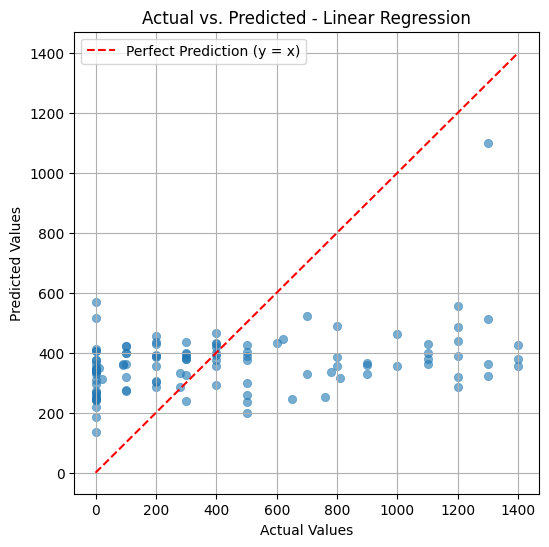

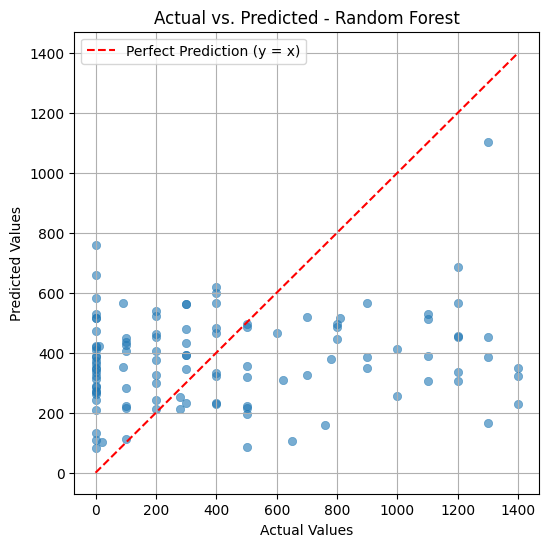

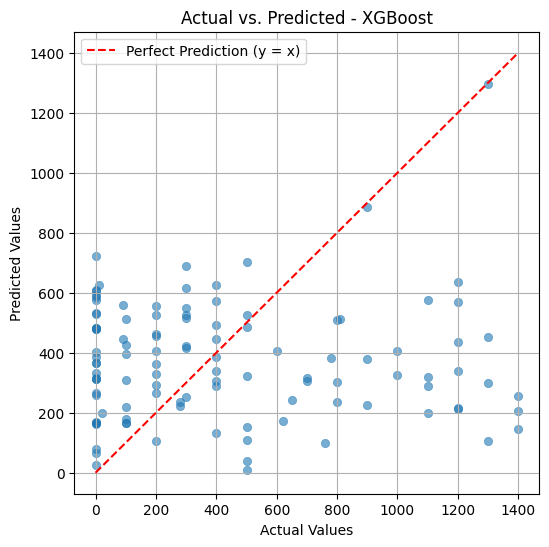

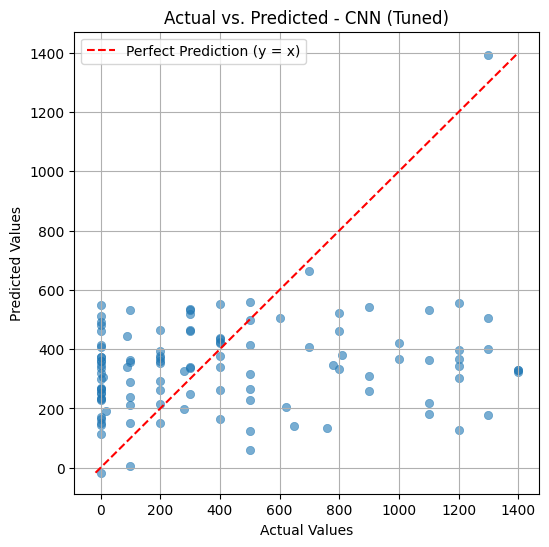

In [89]:
def plot_actual_vs_pred(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, edgecolor=None)


    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction (y = x)")

    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_actual_vs_pred(y_test, y_pred_lr, "Linear Regression")
plot_actual_vs_pred(y_test, y_pred_rf, "Random Forest")
plot_actual_vs_pred(y_test, y_pred_xgb, "XGBoost")
plot_actual_vs_pred(y_test, y_pred_cnn.flatten(), "CNN (Tuned)")